In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
  
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
df = pd.read_csv("/content/gdrive/MyDrive/Python/imdb_master.csv", encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values
print(np.unique(y))
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
['neg' 'pos' 'unsup']
Epoch 1/5
293/293 [==============================] - 5s 5ms/step - loss: 0.9246 - acc: 0.4976 - val_loss: 0.8426 - val_acc: 0.5108
Epoch 2/5
293/293 [==============================] - 1s 4ms/step - loss: 0.7859 - acc: 0.5842 - val_loss: 0.8428 - val_acc: 0.5181
Epoch 3/5
293/293 [==============================] - 1s 4ms/step - loss: 0.6792 - acc: 0.6878 - val_loss: 0.8749 - val_acc: 0.5085
Epoch 4/5
293/293 [==============================] - 1s 4ms/step - loss: 0.4928 - acc: 0.8258 - val_loss: 0.9572 - val_acc: 0.5158
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 1.0648 - acc: 0.5065
Evaluation result on Test Data : Loss = 1.064846158027649, accuracy = 0.50

In [5]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from keras.layers import Flatten
df = pd.read_csv("/content/gdrive/MyDrive/Python/imdb_master.csv", encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values
# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
# print(input_dim)
model = Sequential()
model.add(Embedding(2000, 50, input_length=2000))
model.add(Flatten())
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
Epoch 1/5
293/293 [==============================] - 23s 68ms/step - loss: 1.4074 - acc: 0.4670 - val_loss: 0.8695 - val_acc: 0.5049
Epoch 2/5
293/293 [==============================] - 20s 68ms/step - loss: 0.8475 - acc: 0.5221 - val_loss: 0.8424 - val_acc: 0.5177
Epoch 3/5
293/293 [==============================] - 20s 68ms/step - loss: 0.8119 - acc: 0.5474 - val_loss: 0.8372 - val_acc: 0.5171
Epoch 4/5
293/293 [==============================] - 20s 68ms/step - loss: 0.7906 - acc: 0.5628 - val_loss: 0.8411 - val_acc: 0.5114
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.8501 - acc: 0.5119
Evaluation result on Test Data : Loss = 0.8501201272010803, accuracy = 0.511919975280761

In [11]:
 
from keras import Sequential
import numpy as np
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras import layers
from sklearn.datasets import fetch_20newsgroups
newsgroups_train =fetch_20newsgroups(subset='train', shuffle=True)

sentences = newsgroups_train.data
y = newsgroups_train.target
print(np.unique(y))

# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
# getting the vocabulary of data
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=2, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Epoch 1/2
34/34 [==============================] - 15s 443ms/step - loss: 17.2410 - acc: 0.0462 - val_loss: 3.0367 - val_acc: 0.0527
Epoch 2/2
34/34 [==============================] - 15s 436ms/step - loss: 2.9931 - acc: 0.0611 - val_loss: 2.9819 - val_acc: 0.0619


   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
Epoch 1/2
293/293 [==============================] - 21s 71ms/step - loss: 1.2208 - acc: 0.4827 - val_loss: 0.8727 - val_acc: 0.5094
Epoch 2/2
293/293 [==============================] - 20s 69ms/step - loss: 0.8557 - acc: 0.5232 - val_loss: 0.8473 - val_acc: 0.5170
Epoch 1/3
293/293 [==============================] - 21s 71ms/step - loss: 0.8242 - acc: 0.5377 - val_loss: 0.8400 - val_acc: 0.5158
Epoch 2/3
293/293 [==============================] - 21s 70ms/step - loss: 0.8052 - acc: 0.5531 - val_loss: 0.8384 - val_acc: 0.5115
Epoch 3/3
293/293 [==============================] - 20s 70ms/step - loss: 0.7895 - acc: 0.5686 - val_loss: 0.8409 - val_acc: 0.5108


Text(0, 0.5, 'accuracy')

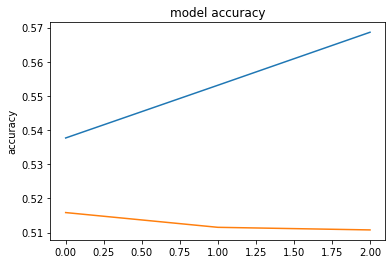

In [7]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.callbacks import TensorBoard
from time import time
df = pd.read_csv("/content/gdrive/MyDrive/Python/imdb_master.csv", encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
#print(input_dim)
model = Sequential()
model.add(Embedding(2000, 50, input_length=2000))
model.add(Flatten())
model.add(layers.Dense(300,input_dim=2000, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))
tensorborad = TensorBoard(log_dir="logs/{}".format(time()))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(X_train, y_train,
          batch_size=256,
          epochs=2,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[tensorborad])
history=model.fit(X_train,y_train, epochs=3, verbose=True, validation_data=(X_test,y_test), batch_size=256)
# For accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]
['neg' 'pos' 'unsup']
Epoch 1/5
293/293 [==============================] - 47s 160ms/step - loss: 1.5172 - acc: 0.4792 - val_loss: 0.8701 - val_acc: 0.4999
Epoch 2/5
293/293 [==============================] - 47s 160ms/step - loss: 0.8561 - acc: 0.5112 - val_loss: 0.8556 - val_acc: 0.5008
Epoch 3/5
293/293 [==============================] - 46s 157ms/step - loss: 0.8320 - acc: 0.5241 - val_loss: 0.8563 - val_acc: 0.4988
Epoch 4/5
293/293 [==============================] - 45s 155ms/step - loss: 0.8002 - acc: 0.5461 - val_loss: 0.8692 - val_acc: 0.5002
Epoch 5/5
293/293 [==============================] - 45s 154ms/step - loss: 0.7481 - acc: 0.5890 - val_loss: 0.8931 - val_acc: 0.4982


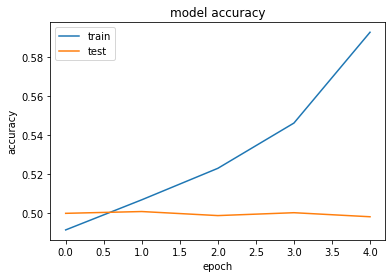

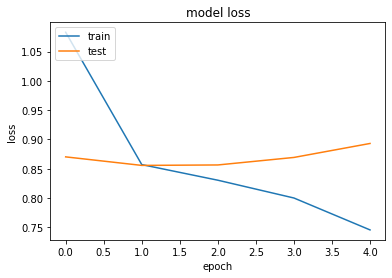

ValueError: ignored

In [8]:
  
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
df = pd.read_csv("/content/gdrive/MyDrive/Python/imdb_master.csv", encoding='latin-1') # --> Changed the csv file where 'id' column name is missing
print(df.head())
sentences = df['review'].values
y = df['label'].values
print(np.unique(y))  # --> Gives 3 labels as {neg, pos, unsup}
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
max_review_len= max([len(s.split()) for s in sentences])
vocab_size= len(tokenizer.word_index)+1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs= pad_sequences(sentences,maxlen=max_review_len)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
# print(input_dim)
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)
# For accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# For loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
predicted = model.predict(X_test[17].reshape(1, 885))
print("Actual value=" + str(y_test[17]) + "    Predicted value=" + str(predicted.argmax()))